In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize
from sklearn.cluster import KMeans
import os

In [2]:
df = pd.read_csv('input_data/populartimes_20211201-132821.csv', dtype = str, encoding='utf-8', delimiter = ',')

In [3]:
# one_month_df = []
# for csv_file in os.listdir('input_data'):
#     file_path = 'input_data/' + csv_file
#     df = pd.read_csv(file_path, dtype = str, encoding='utf-8', delimiter = ',')
#     one_month_df.append(df)

# df = pd.concat(one_month_df, axis=0)

In [4]:
df.reset_index(inplace=True, drop=True)

In [5]:
json_string = df['popular_times'][0]

In [6]:
json_string = df['popular_times'][0][1:-1].replace("'",'"')

In [7]:
json_obj = json.loads('[' + json_string + ']')

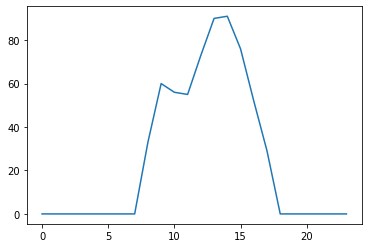

In [8]:
plt.plot(json_obj[0]['data'])
plt.show()

In [9]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]

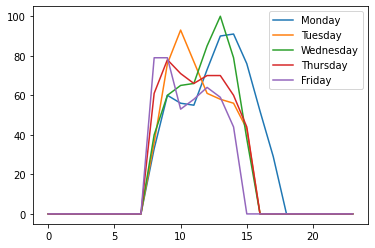

In [10]:
for day in range(5):
    plt.plot(json_obj[day]['data'], label=weekDays[day])
    plt.legend()
plt.show()

In [11]:
weekday_data = np.array([json_obj[day]['data'] for day in range(5)])

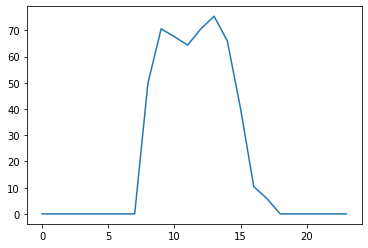

In [12]:
plt.plot(weekday_data.mean(axis = 0))
plt.show()

### Assumed that rates are normally distributed

In [13]:
l = 0
mu = weekday_data[l].mean()

In [14]:
std = weekday_data[l].std()

In [15]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

x = np.linspace(0, 24, 24)
popt, _ = optimize.curve_fit(gaussian, x, weekday_data[l])

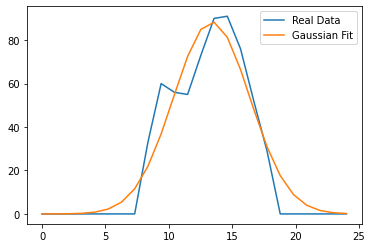

In [16]:
plt.plot(x, weekday_data[l], label='Real Data')
plt.plot(x, gaussian(x, *popt), label='Gaussian Fit')
plt.legend()
plt.show()

### Process one row at a time

In [17]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]

In [18]:
row_idx = 0
row = df['popular_times'][row_idx][1:-1].replace("'",'"')
json_row_obj = json.loads('['+row+']')

In [19]:
row_data = []  # mu1,std1,mu2,std2

In [20]:
day_of_week_idx = 0
day_of_week = np.array(json_row_obj[day_of_week_idx]['data'])

In [21]:
mu = day_of_week.mean()
std = day_of_week.std()

row_data.append(mu)
row_data.append(std)

In [22]:
df

,place_id,name,lat,lon,node_type,address,place,popular_times,rating,rating_n,current_popularity,time_spent
0,ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,47.4554815,19.040086499999997,bank,"Budapest, Fehérvári út 130","Erste Bank fiók Budapest, Fehérvári út 130 bud...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",2.4,39,60,"[15, 45]"
1,ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,47.3995473,19.0506207,car_repair,"Budapest, II. Rákóczi Ferenc utca 279","4P Car Kft. Budapest, II. Rákóczi Ferenc utca ...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.5,60,NaN,NaN
2,ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,47.5706476,19.064781699999997,restaurant,"Budapest, Római part 26","Nyárfás Kávéház Budapest, Római part 26 budapest","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.1,292,NaN,NaN
3,ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,47.5442588,19.1156514,liquor_store,"Budapest, Alkotmány utca 20","M3 Sztráda Italdiszkont Budapest, Alkotmány ut...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.5,191,NaN,"[10, 10]"
4,ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",47.5067109,19.060857300000002,home_goods_store,"Budapest, Teréz körút 32","Magyar zászló, zászlórúd, zászlótartó bolt és ...",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
7136,ChIJzypzzdDdQUcRv0C7lJCru3E,OTP Bank,47.485982299999996,19.073657,bank,Budapest Futó utca 35-45 Corvin Pláza Budapest...,OTP Bank Budapest Futó utca 35-45 Corvin Pláza...,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",3.2,137,83,"[25, 60]"
7137,ChIJzyxFFoHdQUcRjTr0FOzJklY,Brútusz Állatorvosi rendelő,47.443768,19.0378587,veterinary_care,"Budapest, Vegyész utca","Brútusz Állatorvosi rendelő Budapest, Vegyész ...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.9,357,NaN,"[15, 45]"
7138,ChIJzz5ScFnvQUcRA2ns71BtehI,CIB Bank ATM,47.431850700000005,19.1748818,atm,"Budapest, Margó Tivadar utca 83","CIB Bank ATM Budapest, Margó Tivadar utca 83 b...",None,None,None,None,None
7139,ChIJzz5ScFnvQUcRFCFaUMDx0jc,CIB Bank Pestszentlőrinc II.,47.446859,19.1705859,bank,"Budapest, Üllői út 366","CIB Bank Pestszentlőrinc II. Budapest, Üllői ú...",None,None,None,None,None


# Write in the loop

In [23]:
data = []
for row_idx in range(len(df)):
    idx_name = df['place_id'][row_idx]
    row = df['popular_times'][row_idx][1:-1].replace("'",'"')
    if len(row) < 3:
        continue
    json_row_obj = json.loads('[' + row + ']')
    
    row_data = []  # mu1,std1,mu2,std2
    for day_of_week_idx in range(5):
        day_of_week = np.array(json_row_obj[day_of_week_idx]['data'])
        mu = day_of_week.mean()
        std = day_of_week.std()
        row_data.append(mu)
        row_data.append(std)
    data.append([idx_name] + row_data)
data  = np.array(data)

In [24]:
data

array([['ChIJ--4BfpndQUcRjpJg7hiB8xw', '25.625', '32.99092362554687',
        ..., '31.13902517563594', '18.166666666666668',
        '29.04546244921724'],
       ['ChIJ--6njcznQUcR6bQ3LHor-ys', '16.958333333333332',
        '22.901017383998955', ..., '24.31549003321865',
        '9.708333333333334', '19.75153826639558'],
       ['ChIJ--BmJ4nZQUcRMc0w0MHSLfI', '6.625', '8.726456420945828', ...,
        '8.871673868116558', '10.416666666666666', '11.430648372783681'],
       ...,
       ['ChIJzypzzdDdQUcRv0C7lJCru3E', '28.791666666666668',
        '36.620780947738155', ..., '34.77364802867571',
        '26.166666666666668', '32.26151818429436'],
       ['ChIJzyxFFoHdQUcRjTr0FOzJklY', '11.0', '21.698694277152562', ...,
        '31.697791721190924', '13.958333333333334', '28.4758364914692'],
       ['ChIJzzl8nE7BQUcRAv3CB7CJjoc', '19.875', '22.712537837062595',
        ..., '40.88141302053484', '24.791666666666668',
        '28.615233656607145']], dtype='<U32')

In [25]:
col_names = ['place_id']
for week_day in weekDays:
    col_names.append(week_day+'_mean')
    col_names.append(week_day+'_std')

In [26]:
col_names

['place_id',
 'Monday_mean',
 'Monday_std',
 'Tuesday_mean',
 'Tuesday_std',
 'Wednesday_mean',
 'Wednesday_std',
 'Thursday_mean',
 'Thursday_std',
 'Friday_mean',
 'Friday_std']

In [27]:
df_mean_std = pd.DataFrame(data, columns=col_names)

In [28]:
df_mean_std

,place_id,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
0,ChIJ--4BfpndQUcRjpJg7hiB8xw,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
1,ChIJ--6njcznQUcR6bQ3LHor-ys,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
2,ChIJ--BmJ4nZQUcRMc0w0MHSLfI,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
3,ChIJ--LJ2QDbQUcRL4TvuTljDPo,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
4,ChIJ--ioiVzcQUcR5GRiAswH1w0,21.125,30.714155938264035,16.125,23.20436830282896,19.333333333333332,28.929031938329512,21.166666666666668,31.548463600555188,23.833333333333332,34.68509125770834
...,...,...,...,...,...,...,...,...,...,...,...
5677,ChIJzxgIbpzaQUcR28-Z3JK8-2Q,33.958333333333336,39.14979689886299,25.166666666666668,29.74428049595791,27.958333333333332,32.95891276355389,26.083333333333332,31.195508045586024,23.083333333333332,26.8699284620476
5678,ChIJzyM3h_XBQUcRFr6_SAqXs5c,22.666666666666668,31.208528036775814,20.583333333333332,26.840449366995,20.291666666666668,27.479506252640146,23.125,30.29756934695147,21.208333333333332,26.457480301209504
5679,ChIJzypzzdDdQUcRv0C7lJCru3E,28.791666666666668,36.620780947738155,29.166666666666668,35.6565406186423,31.291666666666668,39.04215581337121,28.291666666666668,34.77364802867571,26.166666666666668,32.26151818429436
5680,ChIJzyxFFoHdQUcRjTr0FOzJklY,11.0,21.698694277152562,7.166666666666667,19.104246183040626,13.833333333333334,27.20855666064548,16.0,31.697791721190924,13.958333333333334,28.4758364914692


In [29]:
df_mean_std.to_numpy()

array([['ChIJ--4BfpndQUcRjpJg7hiB8xw', '25.625', '32.99092362554687',
        ..., '31.13902517563594', '18.166666666666668',
        '29.04546244921724'],
       ['ChIJ--6njcznQUcR6bQ3LHor-ys', '16.958333333333332',
        '22.901017383998955', ..., '24.31549003321865',
        '9.708333333333334', '19.75153826639558'],
       ['ChIJ--BmJ4nZQUcRMc0w0MHSLfI', '6.625', '8.726456420945828', ...,
        '8.871673868116558', '10.416666666666666', '11.430648372783681'],
       ...,
       ['ChIJzypzzdDdQUcRv0C7lJCru3E', '28.791666666666668',
        '36.620780947738155', ..., '34.77364802867571',
        '26.166666666666668', '32.26151818429436'],
       ['ChIJzyxFFoHdQUcRjTr0FOzJklY', '11.0', '21.698694277152562', ...,
        '31.697791721190924', '13.958333333333334', '28.4758364914692'],
       ['ChIJzzl8nE7BQUcRAv3CB7CJjoc', '19.875', '22.712537837062595',
        ..., '40.88141302053484', '24.791666666666668',
        '28.615233656607145']], dtype=object)

In [30]:
df_mean_std.index = df_mean_std.iloc[:, 0].copy(deep=True)
df_mean_std.drop('place_id', inplace=True, axis=1)

In [31]:
df_mean_std

,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
place_id,,,,,,,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
ChIJ--6njcznQUcR6bQ3LHor-ys,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
ChIJ--LJ2QDbQUcRL4TvuTljDPo,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
ChIJ--ioiVzcQUcR5GRiAswH1w0,21.125,30.714155938264035,16.125,23.20436830282896,19.333333333333332,28.929031938329512,21.166666666666668,31.548463600555188,23.833333333333332,34.68509125770834
...,...,...,...,...,...,...,...,...,...,...
ChIJzxgIbpzaQUcR28-Z3JK8-2Q,33.958333333333336,39.14979689886299,25.166666666666668,29.74428049595791,27.958333333333332,32.95891276355389,26.083333333333332,31.195508045586024,23.083333333333332,26.8699284620476
ChIJzyM3h_XBQUcRFr6_SAqXs5c,22.666666666666668,31.208528036775814,20.583333333333332,26.840449366995,20.291666666666668,27.479506252640146,23.125,30.29756934695147,21.208333333333332,26.457480301209504
ChIJzypzzdDdQUcRv0C7lJCru3E,28.791666666666668,36.620780947738155,29.166666666666668,35.6565406186423,31.291666666666668,39.04215581337121,28.291666666666668,34.77364802867571,26.166666666666668,32.26151818429436


In [32]:
poi_df = df[['place_id', 'name', 'node_type', 'lat', 'lon']]
poi_df.index = poi_df.iloc[:, 0].copy(deep=True)
poi_df.drop('place_id', inplace=True, axis=1)

C:\Users\Rustam\Desktop\Projects\traffic-data-mining\venv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
poi_df

,name,node_type,lat,lon
place_id,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,bank,47.4554815,19.040086499999997
ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,car_repair,47.3995473,19.0506207
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,restaurant,47.5706476,19.064781699999997
ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,liquor_store,47.5442588,19.1156514
ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",home_goods_store,47.5067109,19.060857300000002
...,...,...,...,...
ChIJzypzzdDdQUcRv0C7lJCru3E,OTP Bank,bank,47.485982299999996,19.073657
ChIJzyxFFoHdQUcRjTr0FOzJklY,Brútusz Állatorvosi rendelő,veterinary_care,47.443768,19.0378587
ChIJzz5ScFnvQUcRA2ns71BtehI,CIB Bank ATM,atm,47.431850700000005,19.1748818


In [34]:
final_df = pd.concat([poi_df, df_mean_std], axis=1)

In [35]:
final_df

,name,node_type,lat,lon,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
place_id,,,,,,,,,,,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,bank,47.4554815,19.040086499999997,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,car_repair,47.3995473,19.0506207,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,restaurant,47.5706476,19.064781699999997,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,liquor_store,47.5442588,19.1156514,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",home_goods_store,47.5067109,19.060857300000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJzypzzdDdQUcRv0C7lJCru3E,OTP Bank,bank,47.485982299999996,19.073657,28.791666666666668,36.620780947738155,29.166666666666668,35.6565406186423,31.291666666666668,39.04215581337121,28.291666666666668,34.77364802867571,26.166666666666668,32.26151818429436
ChIJzyxFFoHdQUcRjTr0FOzJklY,Brútusz Állatorvosi rendelő,veterinary_care,47.443768,19.0378587,11.0,21.698694277152562,7.166666666666667,19.104246183040626,13.833333333333334,27.20855666064548,16.0,31.697791721190924,13.958333333333334,28.4758364914692
ChIJzz5ScFnvQUcRA2ns71BtehI,CIB Bank ATM,atm,47.431850700000005,19.1748818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
final_df.dropna(inplace=True, how='all', subset=final_df.columns[5:], axis=0)

In [37]:
final_df.to_csv('outt.csv', index=False)

In [38]:
final_df

,name,node_type,lat,lon,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
place_id,,,,,,,,,,,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,bank,47.4554815,19.040086499999997,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,car_repair,47.3995473,19.0506207,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,restaurant,47.5706476,19.064781699999997,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,liquor_store,47.5442588,19.1156514,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
ChIJ--ioiVzcQUcR5GRiAswH1w0,Tasting Table Budapest,liquor_store,47.492449,19.065122600000002,21.125,30.714155938264035,16.125,23.20436830282896,19.333333333333332,28.929031938329512,21.166666666666668,31.548463600555188,23.833333333333332,34.68509125770834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJzxgIbpzaQUcR28-Z3JK8-2Q,Flora-Medoswiss Gyógyszertár,pharmacy,47.58105689999999,19.162233899999997,33.958333333333336,39.14979689886299,25.166666666666668,29.74428049595791,27.958333333333332,32.95891276355389,26.083333333333332,31.195508045586024,23.083333333333332,26.8699284620476
ChIJzyM3h_XBQUcRFr6_SAqXs5c,Gumistone kft,car_repair,47.4281229,19.209842899999998,22.666666666666668,31.208528036775814,20.583333333333332,26.840449366995,20.291666666666668,27.479506252640146,23.125,30.29756934695147,21.208333333333332,26.457480301209504
ChIJzypzzdDdQUcRv0C7lJCru3E,OTP Bank,bank,47.485982299999996,19.073657,28.791666666666668,36.620780947738155,29.166666666666668,35.6565406186423,31.291666666666668,39.04215581337121,28.291666666666668,34.77364802867571,26.166666666666668,32.26151818429436


In [39]:
data = final_df.to_numpy()

In [53]:
data = data[:,4:].astype(float)

In [54]:
data

array([[20.83333333, 31.16042718, 22.20833333, ..., 31.13902518,
        18.16666667, 29.04546245],
       [21.875     , 30.26041487, 20.875     , ..., 24.31549003,
         9.70833333, 19.75153827],
       [ 5.75      ,  7.91754381,  5.        , ...,  8.87167387,
        10.41666667, 11.43064837],
       ...,
       [29.16666667, 35.65654062, 31.29166667, ..., 34.77364803,
        26.16666667, 32.26151818],
       [ 7.16666667, 19.10424618, 13.83333333, ..., 31.69779172,
        13.95833333, 28.47583649],
       [26.        , 30.96772513, 20.91666667, ..., 40.88141302,
        24.79166667, 28.61523366]])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
data

array([[20.83333333, 31.16042718, 22.20833333, ..., 31.13902518,
        18.16666667, 29.04546245],
       [21.875     , 30.26041487, 20.875     , ..., 24.31549003,
         9.70833333, 19.75153827],
       [ 5.75      ,  7.91754381,  5.        , ...,  8.87167387,
        10.41666667, 11.43064837],
       ...,
       [29.16666667, 35.65654062, 31.29166667, ..., 34.77364803,
        26.16666667, 32.26151818],
       [ 7.16666667, 19.10424618, 13.83333333, ..., 31.69779172,
        13.95833333, 28.47583649],
       [26.        , 30.96772513, 20.91666667, ..., 40.88141302,
        24.79166667, 28.61523366]])

In [57]:
scaled_data = scaler.fit_transform(data)

In [58]:
scaled_data

array([[-0.21257188,  0.45844585, -0.09429295, ...,  0.3681724 ,
        -0.41516675,  0.38911852],
       [-0.0932033 ,  0.35080212, -0.2479732 , ..., -0.49713881,
        -1.39181563, -0.8439769 ],
       [-1.94102902, -2.32146126, -2.0777286 , ..., -2.45561151,
        -1.3100273 , -1.94797247],
       ...,
       [ 0.74237681,  0.99619229,  0.95265371, ...,  0.8290889 ,
         0.50856026,  0.81581703],
       [-1.77868774, -0.98350362, -1.05959698, ...,  0.43903112,
        -0.90108565,  0.31354192],
       [ 0.37949631,  0.4353982 , -0.24317069, ...,  1.60363133,
         0.34979468,  0.3320368 ]])

In [59]:
scaler.inverse_transform(scaled_data)

array([[20.83333333, 31.16042718, 22.20833333, ..., 31.13902518,
        18.16666667, 29.04546245],
       [21.875     , 30.26041487, 20.875     , ..., 24.31549003,
         9.70833333, 19.75153827],
       [ 5.75      ,  7.91754381,  5.        , ...,  8.87167387,
        10.41666667, 11.43064837],
       ...,
       [29.16666667, 35.65654062, 31.29166667, ..., 34.77364803,
        26.16666667, 32.26151818],
       [ 7.16666667, 19.10424618, 13.83333333, ..., 31.69779172,
        13.95833333, 28.47583649],
       [26.        , 30.96772513, 20.91666667, ..., 40.88141302,
        24.79166667, 28.61523366]])

In [60]:
cost = []
for k in range(3,50,3):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    print(k,kmeans.inertia_, end = '\r')
    cost.append(kmeans.inertia_)

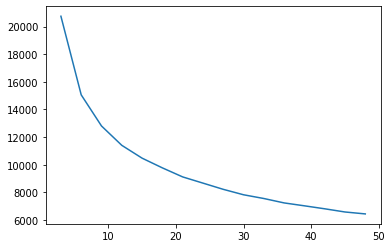

In [61]:
plt.plot(np.arange(3,50,3),np.array(cost))

In [73]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)
print(k,kmeans.inertia_, end = '\r')

In [74]:
pred = kmeans.predict(scaled_data)

In [64]:
len(pred)

5682

In [75]:
# #filter rows of original data
# filtered_label0 = df[label == 0]
 
# #plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
# plt.show()

NameError: name 'label' is not defined

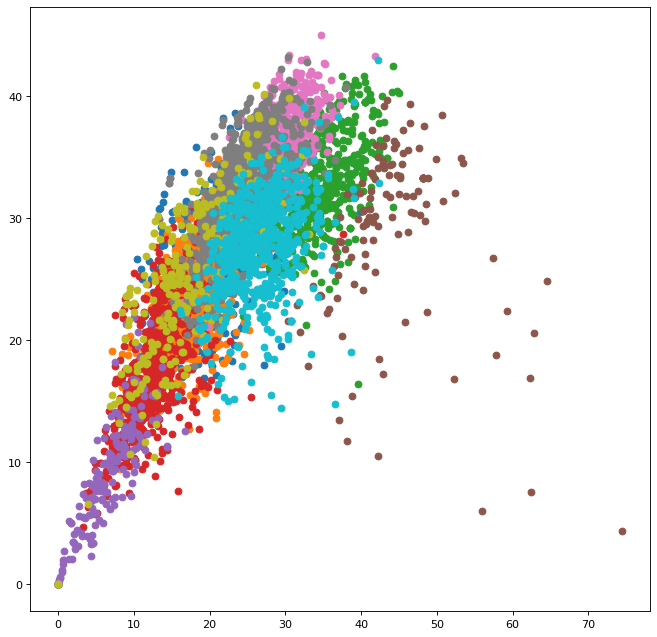

In [76]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
for i in range(k):
    idxs = np.where(pred==i)[0]
    z = scaler.inverse_transform(scaled_data[idxs])
    plt.scatter(z[:,0],z[:,1])
#     plt.scatter(len(z), len(z))

plt.show()

In [91]:
from collections import defaultdict
node_type_clusters = defaultdict(list)
geo_clusters = defaultdict(list)

for idx in range(len(final_df)):
    node_type_clusters[pred[idx]].append(final_df.iloc[idx][1])
    geo_clusters[pred[idx]].append([final_df.iloc[idx][2], final_df.iloc[idx][2]])

In [95]:
node_type_clusters

defaultdict(list,
            {7: ['bank',
              'doctor',
              'car_dealer',
              'store',
              'car_repair',
              'dentist',
              'home_goods_store',
              'car_repair',
              'home_goods_store',
              'gym',
              'bakery',
              'embassy',
              'pharmacy',
              'store',
              'veterinary_care',
              'pharmacy',
              'atm',
              'car_wash',
              'car_repair',
              'furniture_store',
              'bank',
              'hardware_store',
              'convenience_store',
              'courthouse',
              'car_repair',
              'embassy',
              'home_goods_store',
              'doctor',
              'bank',
              'bank',
              'car_repair',
              'bank',
              'home_goods_store',
              'store',
              'book_store',
              'doctor',
              'a